In [1]:
%load_ext autoreload
%autoreload 2

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Data_v2
import Data_analysis_func
import Model_checks
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression
import Outlier_detection_v2
import Genes_self_similarity_v2
from matplotlib_venn import venn2, venn2_circles

In [3]:
data = Data_v2.get_format_data_without_na()

In [4]:
data_WT = data[data['mutant_ID'] == 'WT']

In [5]:
mean_intra_distance_for_WT = Genes_self_similarity_v2.get_mean_intra_distance_for_WT(data_WT)

In [6]:
weighted_avg_y2 = (mean_intra_distance_for_WT['mean_intra_gene_distance_y2'] * mean_intra_distance_for_WT['sample_count']).sum() / mean_intra_distance_for_WT['sample_count'].sum()
weighted_avg_ynpq = (mean_intra_distance_for_WT['mean_intra_gene_distance_ynpq'] * mean_intra_distance_for_WT['sample_count']).sum() / mean_intra_distance_for_WT['sample_count'].sum()

print("Weighted Average of mean_intra_gene_distance_y2:", weighted_avg_y2)
print("Weighted Average of mean_intra_gene_distance_ynpq:", weighted_avg_ynpq)

Weighted Average of mean_intra_gene_distance_y2: 0.06337416599846371
Weighted Average of mean_intra_gene_distance_ynpq: 0.061067412590697694


In [7]:
data_flagged = Genes_self_similarity_v2.apply_flagging_WT(data, threshold_distance_y2=2*weighted_avg_y2, threshold_distance_ynpq=2*weighted_avg_ynpq, p=(2/3), threshold_variance = 1)

In [21]:
data_norm = Data_v2.normalize_data_additive(data_flagged)

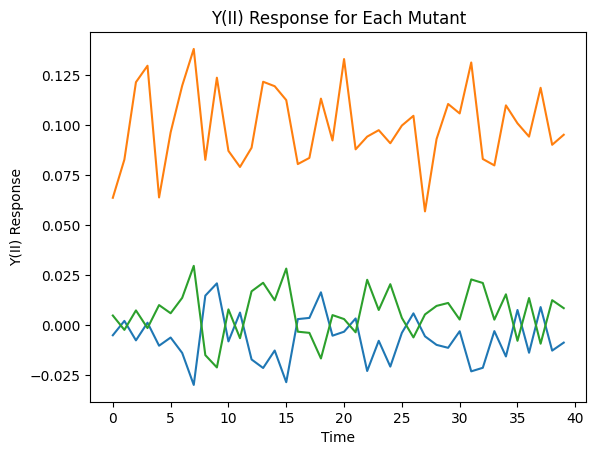

In [37]:
Data_analysis_func.plot_y2(data_norm[(data_norm['plate'] == 4) & (data_norm['mutant_ID'] == 'WT') & (data_norm['light_regime'] == '20h_HL')].iloc[:20])

In [27]:
data_norm_ML_WT_99 = data_norm[(data_norm['plate'] == 99) & (data_norm['light_regime'] == '20h_ML')]

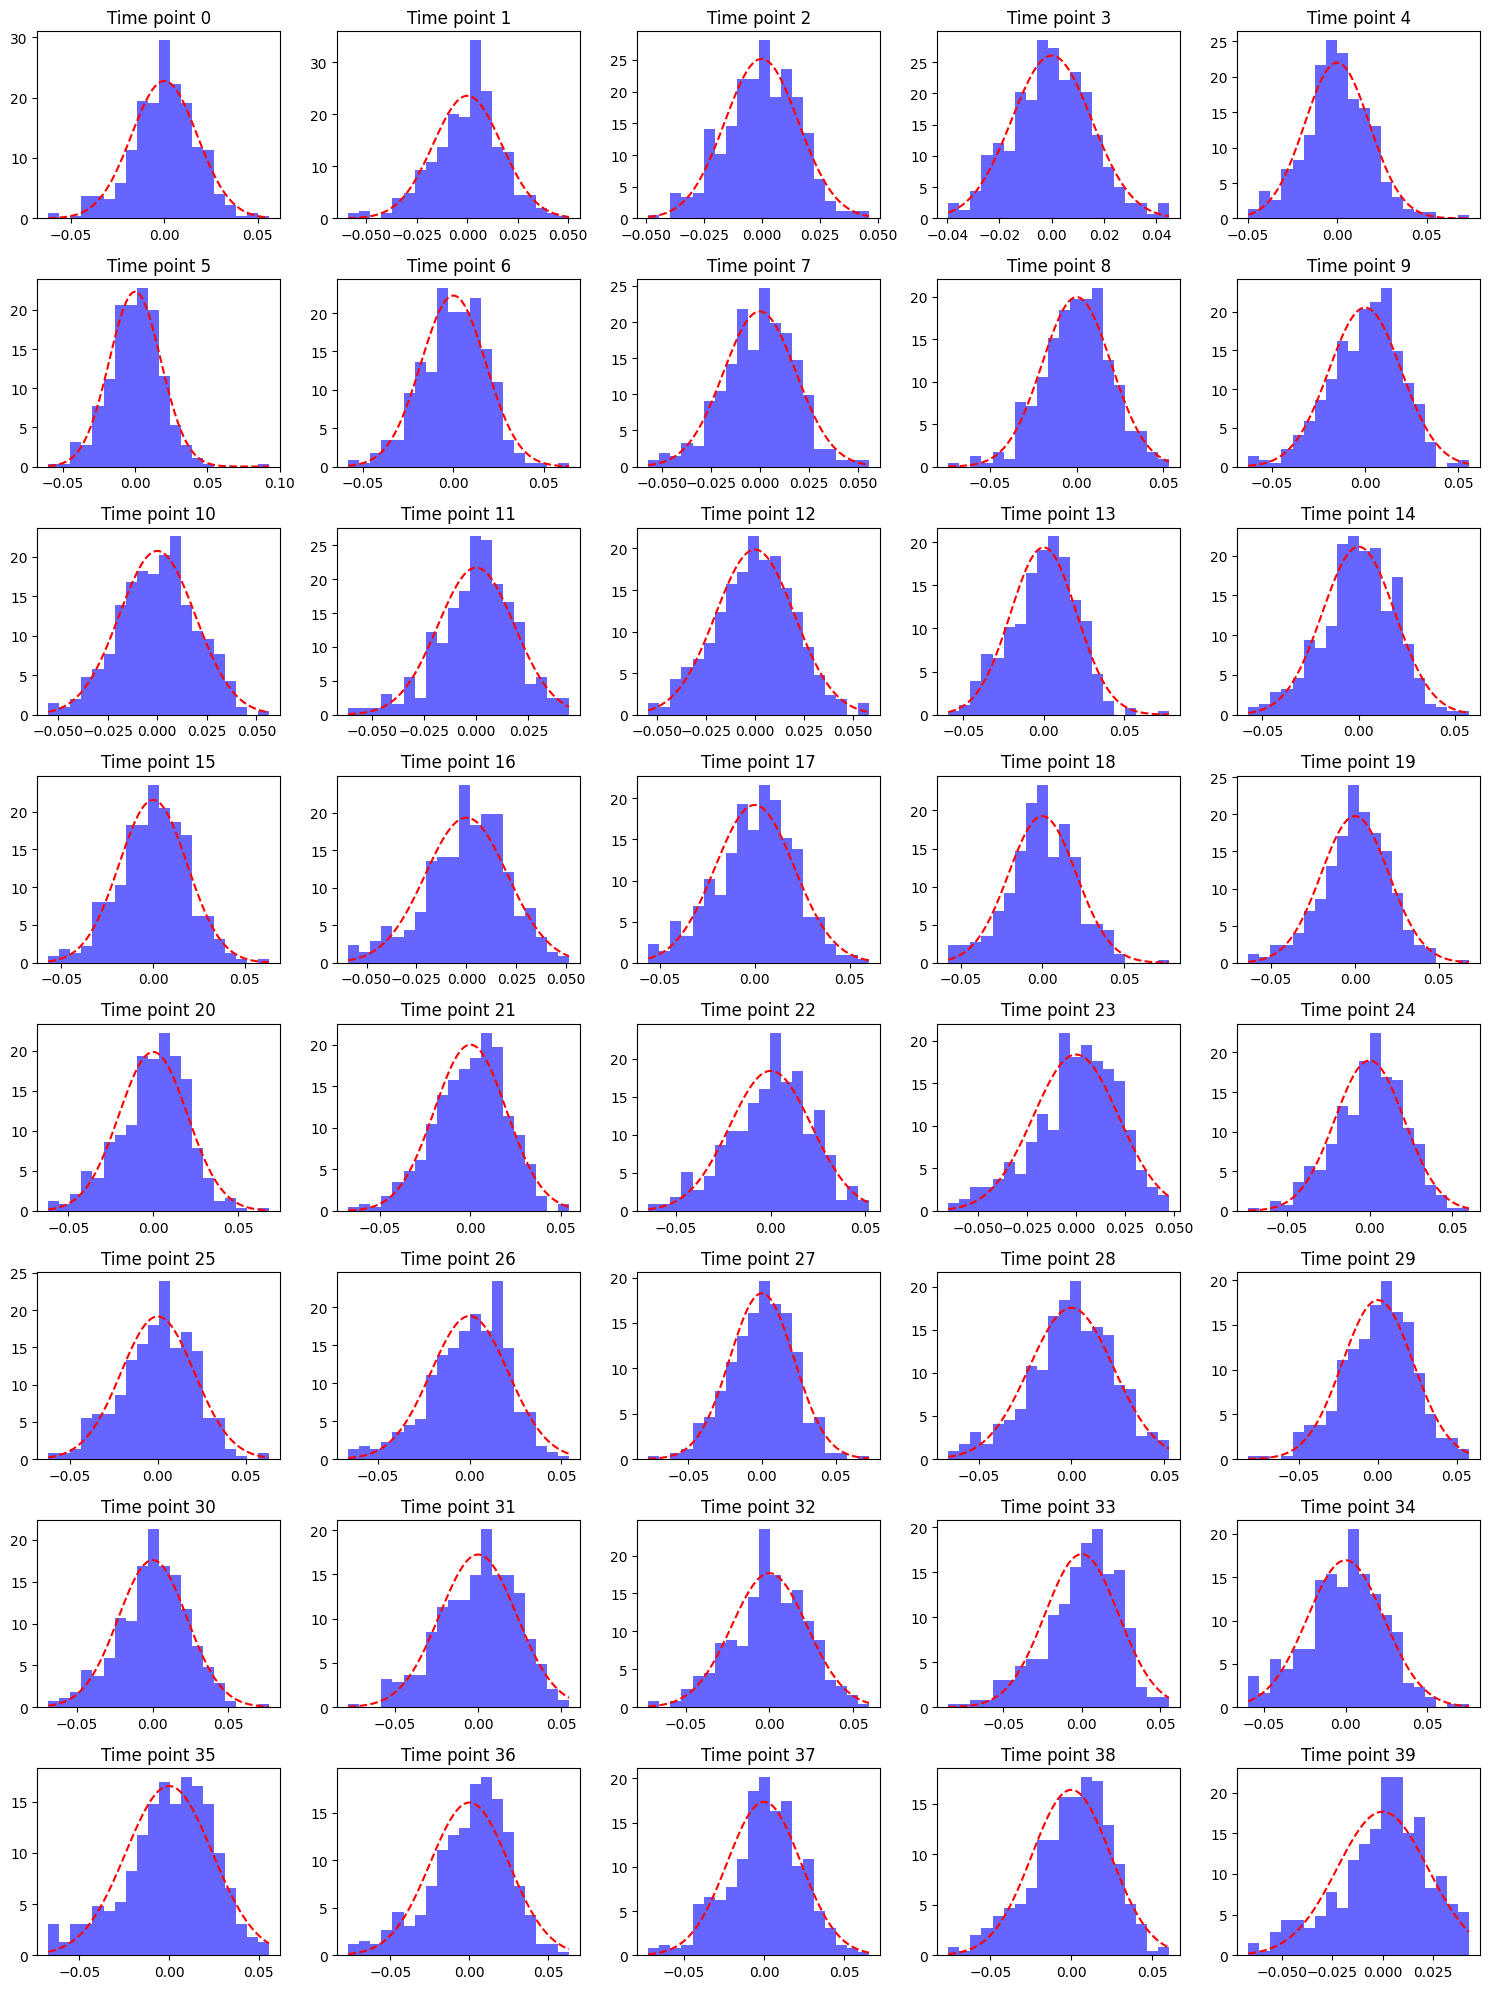

In [30]:
Model_checks.plot_ynpq_normalized_distribution(data_norm_ML_WT_99[data_norm_ML_WT_99['flag_ynpq'] == 'ok'])

In [36]:
data_norm_flagged = Genes_self_similarity_v2.apply_flagging_mutants(data_norm, threshold_distance_y2=2*weighted_avg_y2, threshold_distance_ynpq=2*weighted_avg_ynpq, p=(2/3), threshold_variance = 1)

In [40]:
data_norm_flagged

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,...,mean_ynpq,median,log_likelihood_null,flag_y2_x,flag_ynpq_x,fv_fm_WT,fv_fm_end_WT,ynpqend_WT,flag_y2_y,flag_ynpq_y
0,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,1,-0.006258,...,-0.005308,None,None,ok,ok,0.622337,0.591999,0.011219,ok,ok
1,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,2,-0.016211,...,-0.012518,None,None,ok,ok,0.622337,0.591999,0.011219,ok,ok
2,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,3,-0.005031,...,0.001832,None,None,ok,ok,0.622337,0.591999,0.011219,ok,ok
3,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,4,-0.024731,...,-0.009126,None,None,ok,ok,0.622337,0.591999,0.011219,ok,ok
4,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,5,-0.003857,...,-0.003882,None,None,ok,ok,0.622337,0.591999,0.011219,ok,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47157,6,M6,2024-04-22,30s-30s,15.294150,28.350881,164,15,19,-0.078833,...,-0.059873,None,None,None,None,0.638787,0.605804,0.002948,weird,weird
47158,6,M6,2024-04-22,30s-30s,15.294150,28.350881,164,15,20,-0.022608,...,-0.016283,None,None,None,None,0.638787,0.605804,0.002948,ok,weird
47159,6,M6,2024-04-22,30s-30s,15.294150,28.350881,164,15,21,-0.061109,...,-0.032613,None,None,None,None,0.638787,0.605804,0.002948,ok,ok
47160,6,M6,2024-04-22,30s-30s,15.294150,28.350881,164,15,22,-0.111192,...,-0.036811,None,None,None,None,0.638787,0.605804,0.002948,weird,ok


In [56]:
# rename flag_y2_y into flag_y2 and drop flag_y2_x
data_norm_flagged.rename(columns={'flag_y2_y': 'flag_y2'}, inplace=True)
data_norm_flagged.rename(columns={'flag_ynpq_y': 'flag_ynpq'}, inplace=True)
data_norm_flagged.drop(columns='flag_y2_x', inplace=True)
data_norm_flagged.drop(columns='flag_ynpq_x', inplace=True)

In [57]:
data_norm_flagged['flag_y2'].value_counts()

ok       30956
weird    16206
Name: flag_y2, dtype: int64

In [58]:
data_norm_flagged['flag_ynpq'].value_counts()

ok       31124
weird    16038
Name: flag_ynpq, dtype: int64

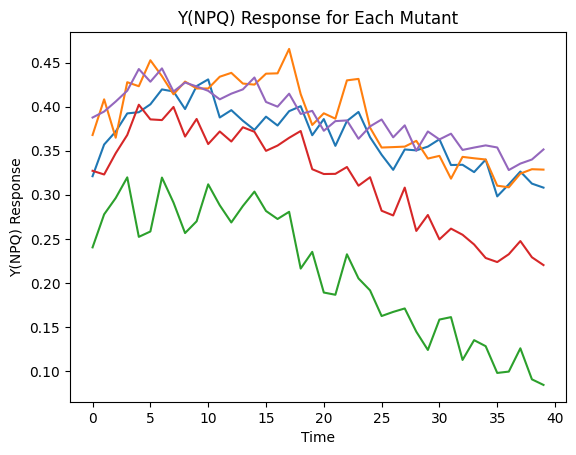

In [144]:
Data_analysis_func.plot_ynpq(data[(data['mutated_genes'] == data['mutated_genes'].unique()[9]) & (data['light_regime'] == '20h_HL')])

In [151]:
data_norm_flagged[(data_norm_flagged['mutated_genes'] == data_norm_flagged['mutated_genes'].unique()[30]) & (data_norm_flagged['light_regime'] == '20h_HL')]

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,ynpqend,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null,fv_fm_WT,fv_fm_end_WT,ynpqend_WT,flag_y2,flag_ynpq,outlier_mean_reduced_v2_y2,outlier_mean_reduced_v2_ynpq,mean_reduced_v2_y2,mean_reduced_v2_ynpq,o

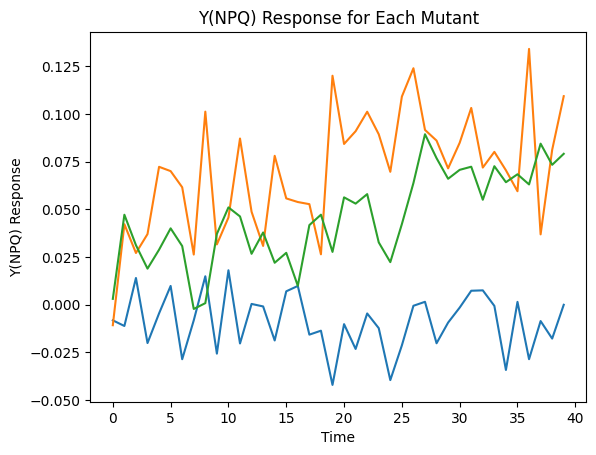

In [181]:
Data_analysis_func.plot_ynpq(data_norm_flagged[(data_norm_flagged['mutated_genes'] == genes_ok[30]) & (data_norm_flagged['light_regime'] == '20h_HL')])

In [169]:
genes_ok = []
c = 0
for gene in data_norm_flagged['mutated_genes'].unique() :
    flags = data_norm_flagged[(data_norm_flagged['mutated_genes'] == gene) & (data_norm_flagged['light_regime'] == '20h_HL')]['flag_ynpq'].values
    if len(flags) > 1 :
        c += 1
        # count the number of 'weird' in flags
        n = len([f for f in flags if f == 'weird'])
        if n < 2  :
            genes_ok.append(gene)
r = len(genes_ok)/c
print(str(100*r) + '% of the genes have at most 1 weird mutant for Y(NPQ)')

41.689879294336116% of the genes have at most 1 weird mutant for Y(NPQ)


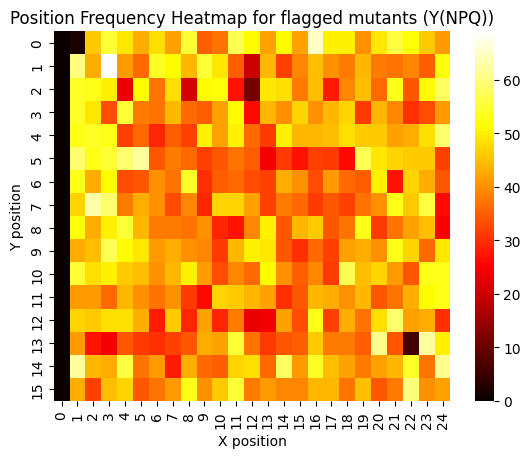

In [177]:
# position_counts = outliers_mean['well_id'].value_counts()
# position_counts = outliers_mean['well_id'].value_counts()/data_norm_ok['well_id'].value_counts()
position_counts = data_norm_flagged[data_norm_flagged['flag_ynpq'] == 'weird']['well_id'].value_counts()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in position_counts.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in position_counts.index]  # Extract numbers for x-axis

# Create a 2D grid to represent the lattice
max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(position_counts.index):
    frequency_grid[y[i]][x[i]] = position_counts[pos]

# Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Frequency Heatmap for flagged mutants (Y(NPQ))')

# Show plot
plt.show()

In [52]:
alpha = 0.05

In [60]:
Outlier_detection_v2.detect_outlier_mean_reduced_v2(data_norm_flagged, alpha)

In [62]:
data_norm_flagged['outlier_mean_reduced_v2_y2'].value_counts()

True     28431
False    18731
Name: outlier_mean_reduced_v2_y2, dtype: int64

In [67]:
data_norm_ok_y2['outlier_mean_reduced_v2_y2'].value_counts()

True     17234
False    13722
Name: outlier_mean_reduced_v2_y2, dtype: int64

In [63]:
data_norm_flagged['outlier_mean_reduced_v2_ynpq'].value_counts()

False    27297
True     19865
Name: outlier_mean_reduced_v2_ynpq, dtype: int64

In [66]:
data_norm_ok_y2 = data_norm_flagged[data_norm_flagged['flag_y2'] == 'ok']
data_norm_ok_ynpq = data_norm_flagged[data_norm_flagged['flag_ynpq'] == 'ok']

In [65]:
print('The proportion of outliers among WT in the case of the mean reduced v2 for y2 with empirical cov is:', data_norm_flagged[(data_norm_flagged['outlier_mean_reduced_v2_y2'] == True) & (data_norm_flagged['mutant_ID'] == 'WT')].shape[0]/data_norm_flagged[data_norm_flagged['mutant_ID'] == 'WT'].shape[0])
print('The proportion of outliers among WT in the case of the mean reduced v2 for ynpq with empirical cov is:', data_norm_flagged[(data_norm_flagged['outlier_mean_reduced_v2_ynpq'] == True) & (data_norm_flagged['mutant_ID'] == 'WT')].shape[0]/data_norm_flagged[data_norm_flagged['mutant_ID'] == 'WT'].shape[0])

The proportion of outliers among WT in the case of the mean reduced v2 for y2 with empirical cov is: 0.08505680163122634
The proportion of outliers among WT in the case of the mean reduced v2 for ynpq with empirical cov is: 0.07573550830177687


In [127]:
print('The proportion of outliers among ok WT in the case of the mean reduced v2 for y2 with empirical cov is:', data_norm_ok_y2[(data_norm_ok_y2['outlier_mean_reduced_v2_y2'] == True) & (data_norm_ok_y2['mutant_ID'] == 'WT')].shape[0]/data_norm_ok_y2[data_norm_ok_y2['mutant_ID'] == 'WT'].shape[0])
print('The proportion of outliers among ok WT in the case of the mean reduced v2 for ynpq with empirical cov is:', data_norm_ok_ynpq[(data_norm_ok_ynpq['outlier_mean_reduced_v2_ynpq'] == True) & (data_norm_ok_ynpq['mutant_ID'] == 'WT')].shape[0]/data_norm_ok_ynpq[data_norm_ok_ynpq['mutant_ID'] == 'WT'].shape[0])

The proportion of outliers among ok WT in the case of the mean reduced v2 for y2 with empirical cov is: 0.040828951438292606
The proportion of outliers among ok WT in the case of the mean reduced v2 for ynpq with empirical cov is: 0.03760099440646364


In [104]:
Outlier_detection_v2.detect_diverging_outliers(data_norm_flagged, alpha, w=10, p=(1/2))

In [109]:
data_norm_flagged['outlier_divergent_end_down_y2'].value_counts()

False    43995
True      3167
Name: outlier_divergent_end_down_y2, dtype: int64

In [81]:
pd.set_option('Display.max_columns', None)

In [82]:
data_norm_flagged[data_norm_flagged['outlier_divergent_end_down_y2'] == True].iloc[:5]

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,ynpqend,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null,fv_fm_WT,fv_fm_end_WT,ynpqend_WT,flag_y2,flag_ynpq,outlier_mean_reduced_v2_y2,outlier_mean_reduced_v2_ynpq,mean_reduced_v2_y2,mean_reduced_v2_ynpq,o

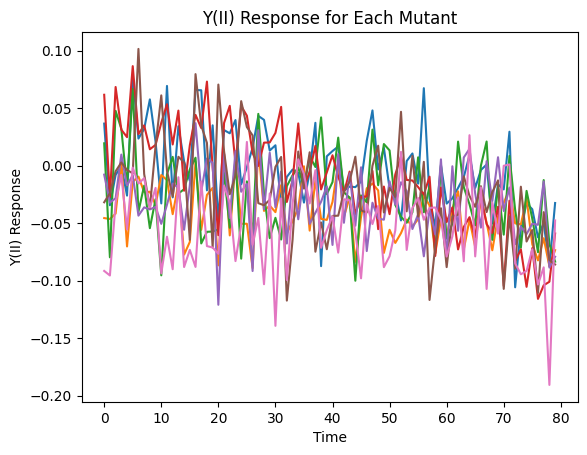

In [114]:
Data_analysis_func.plot_y2(data_norm_flagged[(data_norm_flagged['outlier_divergent_end_down_y2'] == True) & (data_norm_flagged['light_regime'] == '1min-1min')].iloc[90:97])

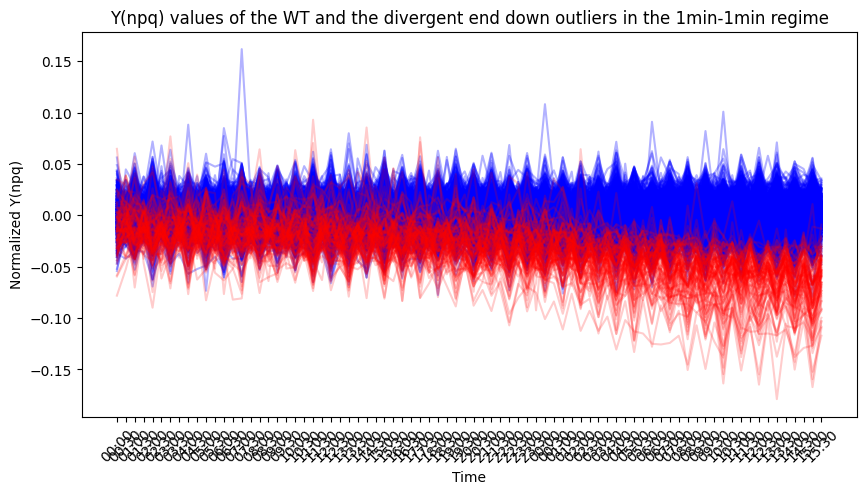

In [126]:
Data_analysis_func.plot_WT_outliers(data_norm_flagged, 'divergent_end_down', 'ynpq', '1min-1min', 100)

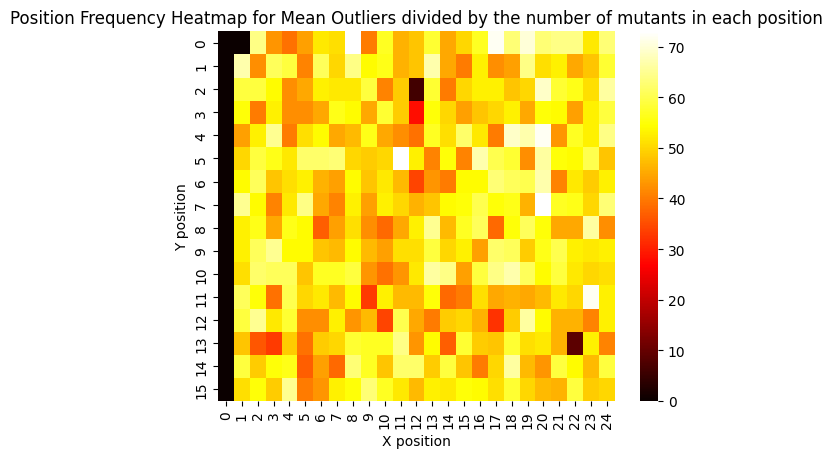

In [184]:
# position_counts = outliers_mean['well_id'].value_counts()
# position_counts = outliers_mean['well_id'].value_counts()/data_norm_ok['well_id'].value_counts()
position_counts = data_norm_flagged[data_norm_flagged['outlier_mean_reduced_v2_ynpq'] == True]['well_id'].value_counts()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in position_counts.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in position_counts.index]  # Extract numbers for x-axis

# Create a 2D grid to represent the lattice
max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(position_counts.index):
    frequency_grid[y[i]][x[i]] = position_counts[pos]

# Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Frequency Heatmap for Mean Outliers divided by the number of mutants in each position')

# Show plot
plt.show()

In [189]:
# add a column that stores the number of mutants that have the same mutated_genes and light_regime as the one from this row
data_norm_flagged['mutated_genes_light_regime_count'] = data_norm_flagged.groupby(['mutated_genes', 'light_regime'])['mutant_ID'].transform('count')